# Geospatial demand estimation

**Original code:** [Alexandros Korkovelos](https://github.com/akorkovelos) <br />
**Support:** [Ariane Millot](https://github.com/ariane-millot), [Martin J. Stringer]()<br />
**Funding:** Imperial College <br />

---------------------------


#### Brief overview

This notebook performs three main analytical processes:

- **Part 1**: Generated grid mesh (H3 hexagons) for the area of interest (given input admin boundary)
- **Part 2**: Extract GIS-based attributes (vecror or raster) to the grid
- **Part 3**: Build blocks estimating demand for the different energy vectors

A slightly more detailed description of the processing bits is presented before each part below. <br />


In [1]:
# Decide if you want to run a region or the country
area = "COUNTRY"
# area = "Copperbelt" # Regions = Central, Copperbelt, Eastern

### Import necessary modules

In [2]:
### Activate geospatial_env first

# Numeric
import numpy as np
import pandas as pd
import math

# System
import os
import shutil
from IPython.display import display, Markdown, HTML, FileLink, FileLinks

# Spatial
import geopandas as gpd
import json
import pyproj
from shapely.geometry import Point, Polygon, MultiPoint
from shapely.wkt import dumps, loads
from shapely.ops import nearest_points
from pyproj import CRS
import ogr, gdal, osr
#import fiona


# Mapping / Plotting
from functools import reduce
#import datapane as dp 
#!datapane login --token="9bde41bfbc4ad14119e32086f9f06d2e5db1d5b8"
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import BeautifyIcon
from folium.plugins import HeatMap
import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

%matplotlib inline

In [3]:
#import geopandas as gpd   # Note that you require geopandas version >= 0.7 that incluse clip see here for installation (https://gis.stackexchange.com/questions/360127/geopandas-0-6-1-installed-instead-of-0-7-0-in-conda-windows-10#)
import os
import fiona
import ipywidgets as widgets
from IPython.display import display
from rasterstats import zonal_stats
import rasterio
from geojson import Feature, Point, FeatureCollection
import rasterio.fill
from shapely.geometry import shape, mapping
import json
#from earthpy import clip    clip has been deprecated to geopandas
#import earthpy.spatial as es
# import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
import gdal
import datetime
import warnings
# import pandas as pd
import scipy.spatial
warnings.filterwarnings('ignore')

#import contextily as ctx
import h3 as h3
from shapely.ops import unary_union
from shapely.geometry.polygon import Polygon

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

root = tk.Tk()
root.withdraw()
root.attributes("-topmost", True)

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
from utils import processing_raster, finalizing_rasters, spatialjoinvectors

### Define directories and dataset names

In [5]:
### Define directories and dataset names
ROOT_DIR = os.path.abspath(os.curdir)
in_path = ROOT_DIR
out_path = ROOT_DIR + "/Outputs"

In [6]:
## Coordinate and projection systems
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
crs_proj = CRS("EPSG:32736")    # Projection system for the selected country -- see http://epsg.io/ for more info

# Part 1. Create base grid with H3

COUNTRY


hexagons                                           geometry     lon  \
0  87399c8a3ffffff  POLYGON ((30.28456 -8.99470, 30.27491 -9.00545... 30.2717   
1  87398e1a0ffffff  POLYGON ((31.43262 -7.33957, 31.42319 -7.35052... 31.4197   
2  87346a855ffffff  POLYGON ((29.31843 -15.55162, 29.30807 -15.561... 29.3056   
3  8755aca0affffff  POLYGON ((22.63741 -15.69516, 22.62725 -15.704... 22.6251   
4  8739b698cffffff  POLYGON ((32.03819 -14.47015, 32.02793 -14.480... 32.0252   

       lat  
0  -8.9908  
1  -7.3360  
2 -15.5467  
3 -15.6905  
4 -14.4652

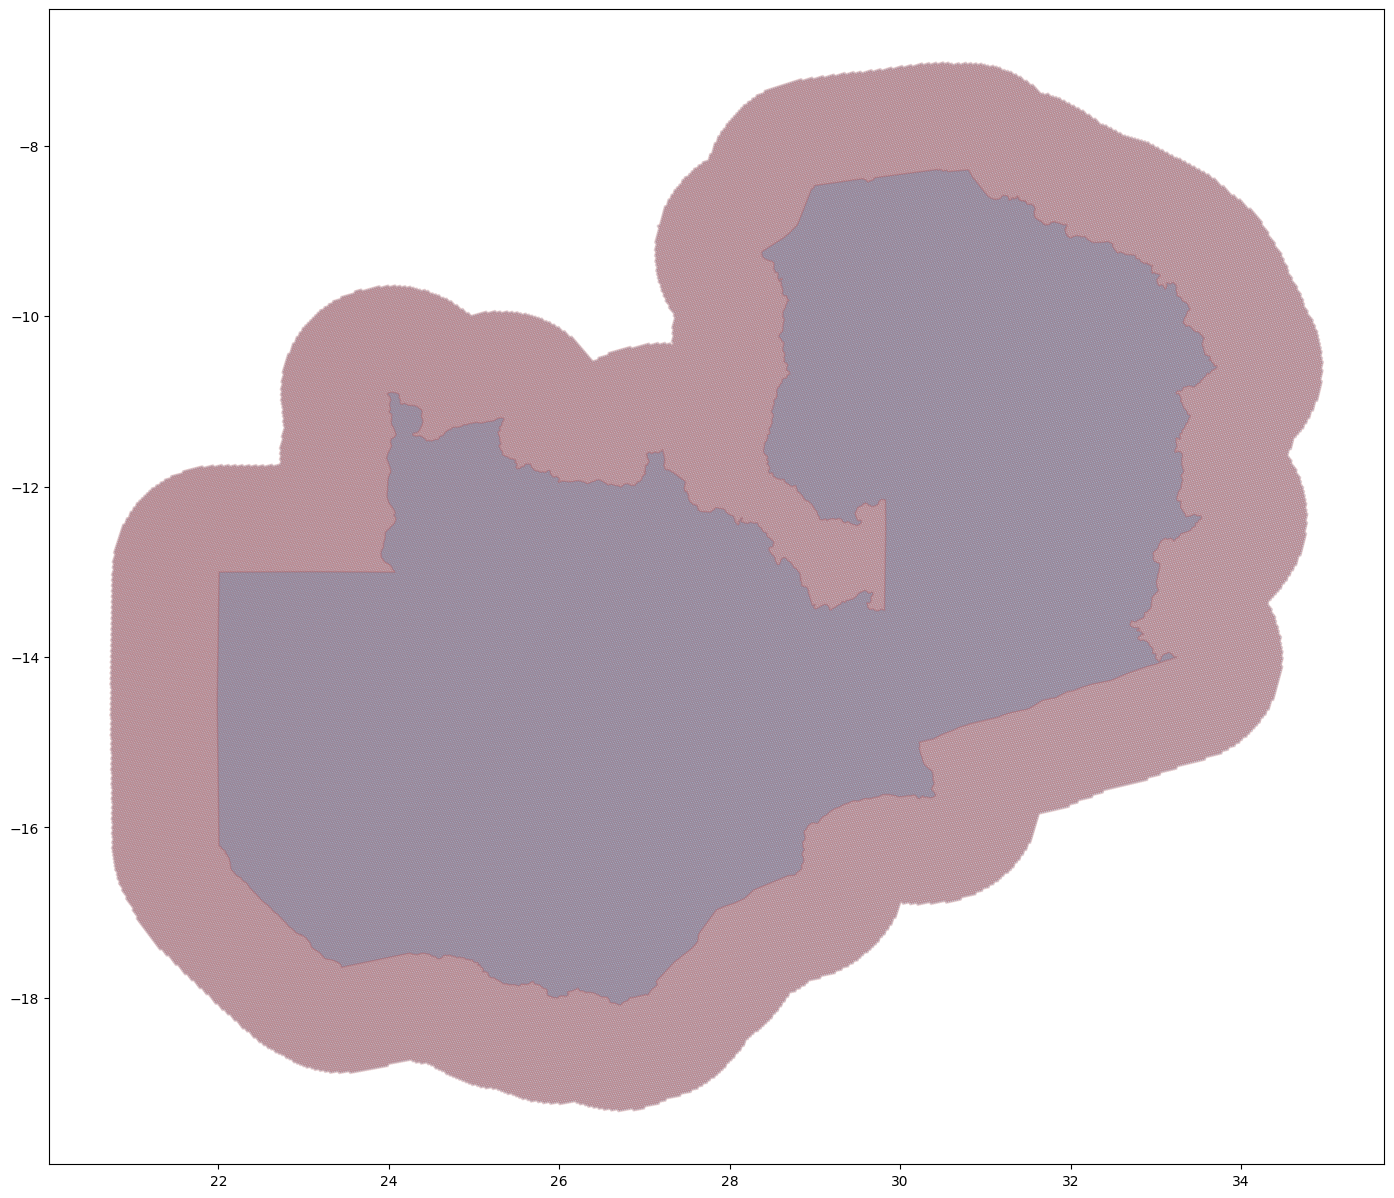

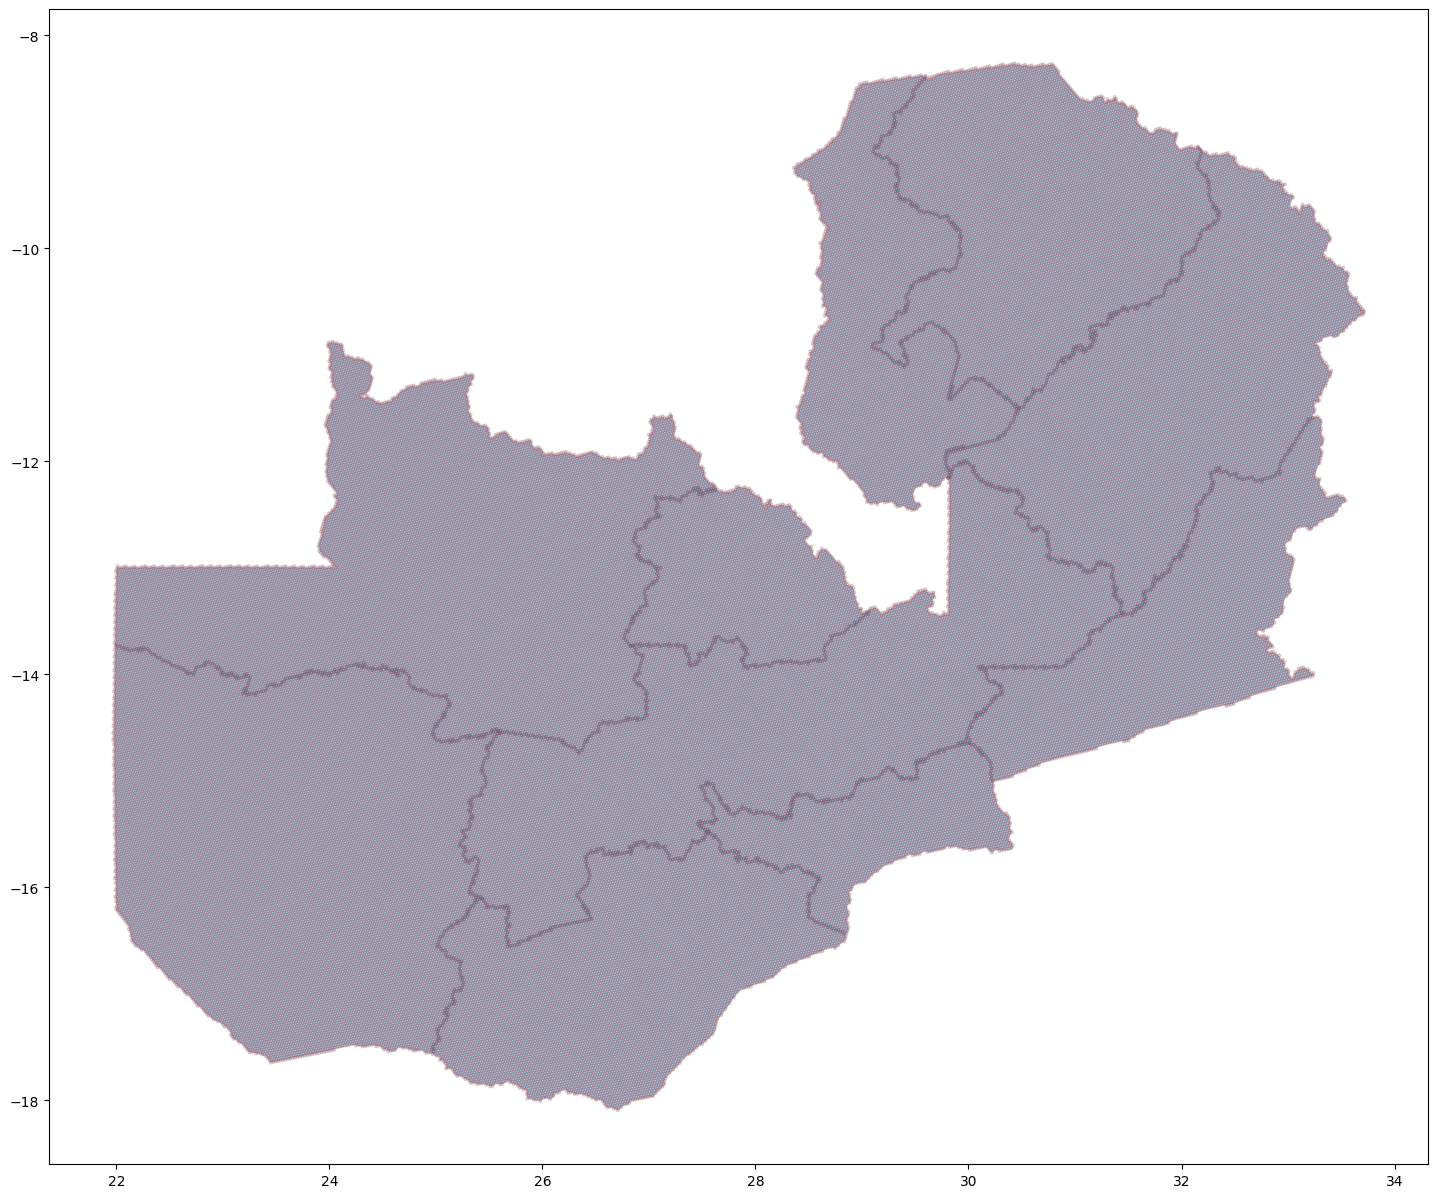

In [7]:
%run BaseGrid.ipynb

# Part 2. Extract GIS-based attributes

## Extract raster values to hexagons

##### Once done with rasters run this cell

In [8]:
# grid = finalizing_rasters(out_path, grid, crs_proj)

Final dataframe

In [9]:
# grid.drop(['index_right'], axis=1, inplace=True)
# grid.head(4)

## Extract information from vector layers

# Part 3. Constructing Multi-vector Demand

### Calculate Total Demand

**Demand = Residential + Commercial + Industrial **

where, 

**Residential** = No of HH with access X average en. cons. kWh/HH/year X wealth adjustment factor

**Commercial**  = (No of buildings X 20 kWh/bld/year) if more than 100 buildings else (No of buildings X 100 kWh/bld/year)

**Industrial**  = Commodity Production (tonnes) from mines X average energy consumption per tonne

2024-06-21 08:41:19.364979
2024-06-21 08:50:36.532284
2024-06-21 10:35:14.040725
2024-06-21 10:43:14.727636
2024-06-21 10:51:07.203985
2024-06-21 10:59:22.456921
2024-06-21 11:00:08.481360
-1.2319999933242798
1.496250033378601
Residential electricity consumption 4022.5 GWh


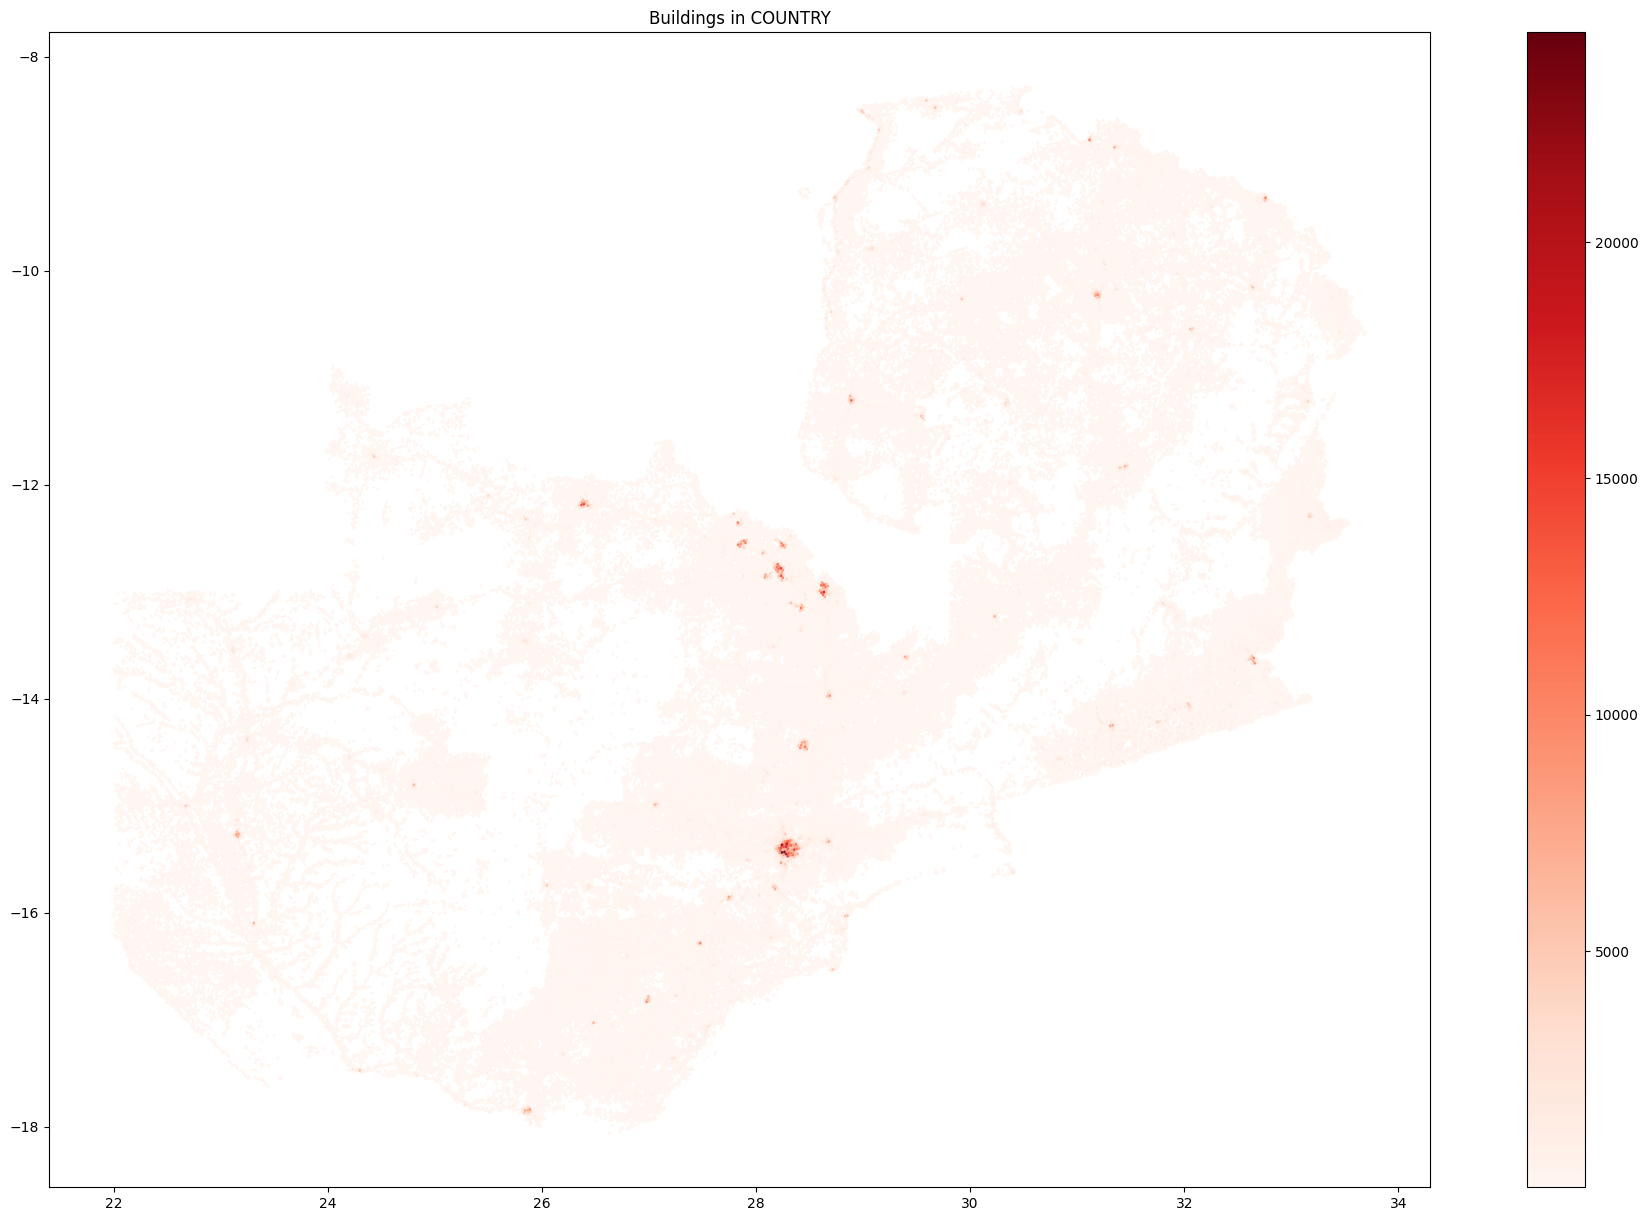

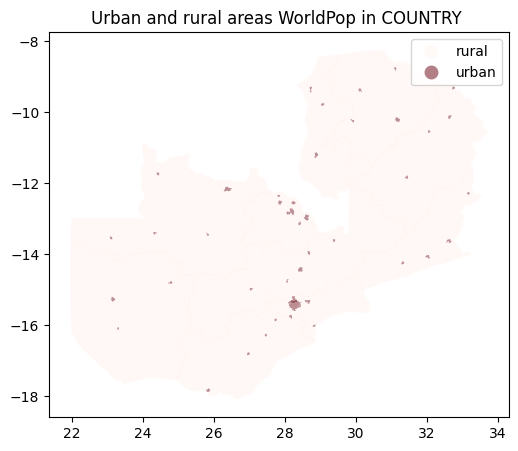

Total population: 17,798,700
   Tier 1  Tier 2  Tier 3  Tier 4  Tier 5
0       8     200     778    2224    4656


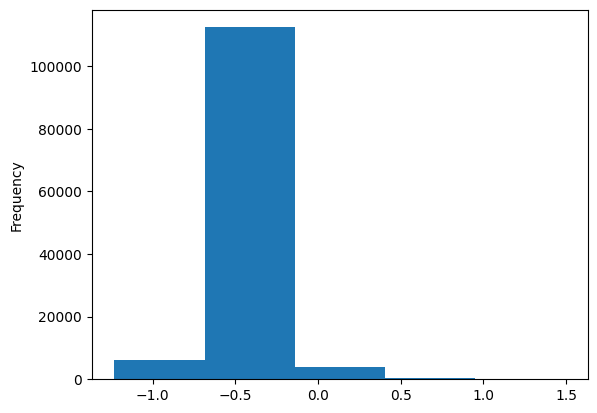

[(-1.2319999933242798, 8), (-0.6863499879837036, 200), (-0.14069998264312744, 778), (0.40495002269744873, 2224), (0.9506000280380249, 4656)]


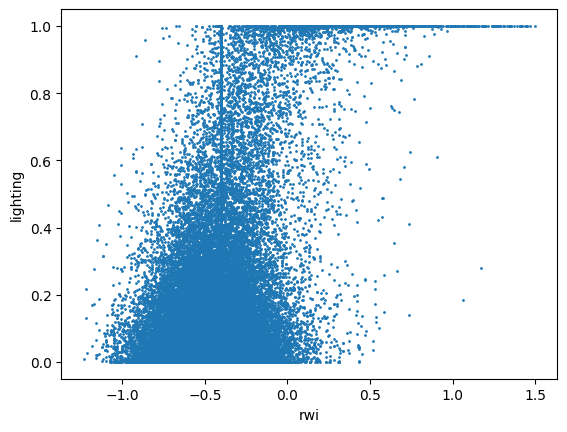

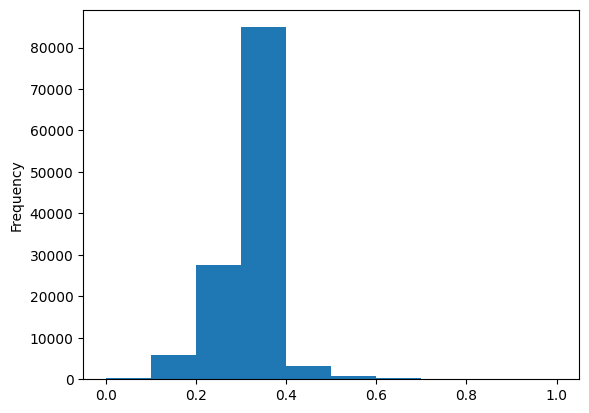

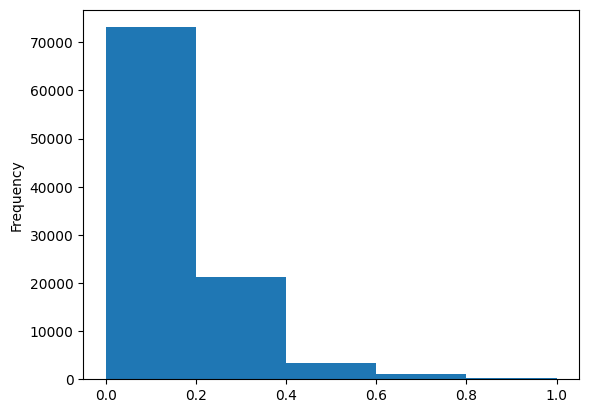

ResEnergyPerHH_index
8       73106
4656    24006
200     21287
778      3411
2224     1178
Name: count, dtype: int64


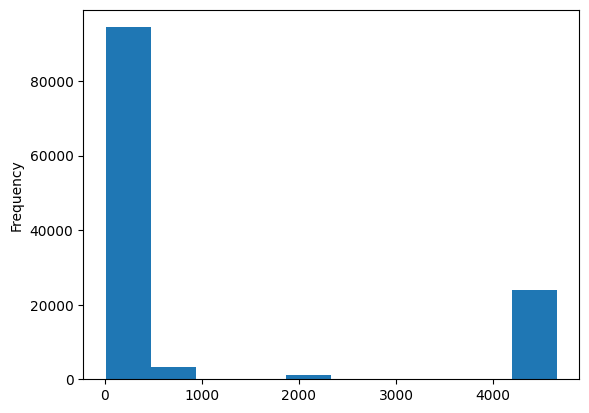

ResEnergyPerHH_index
8      0.00
200    0.02
778    0.05
2224   0.16
4656   0.29
0      0.47
Name: HHwithAccess, dtype: float64
ResEnergyPerHH_index
8      0.00
200    0.00
778    0.02
2224   0.29
4656   0.68
0      0.01
Name: HHwithAccess_urb, dtype: float64
ResEnergyPerHH_index
8      0.00
200    0.04
778    0.07
2224   0.07
4656   0.01
0      0.81
Name: HHwithAccess_rur, dtype: float64


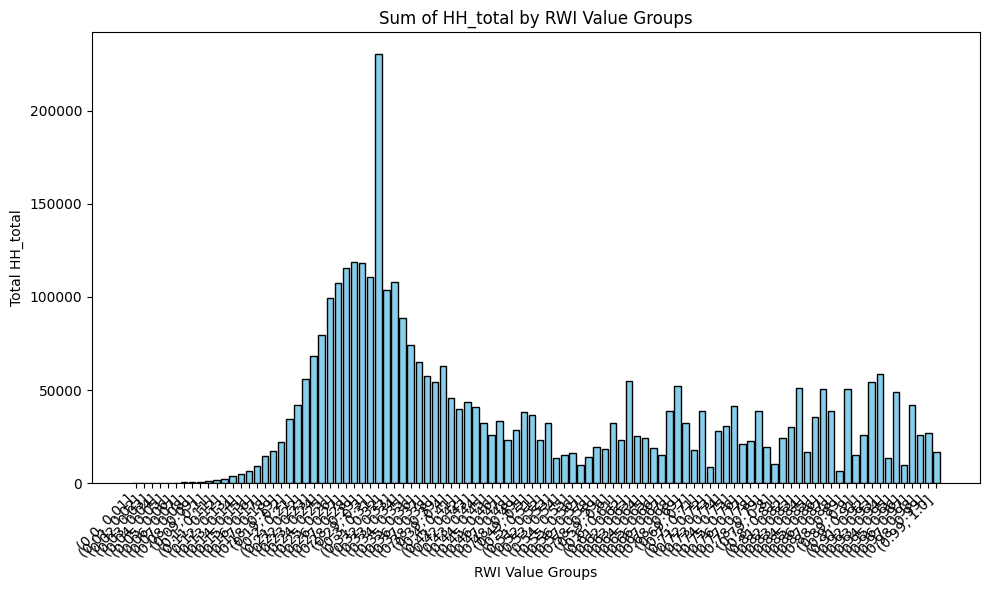

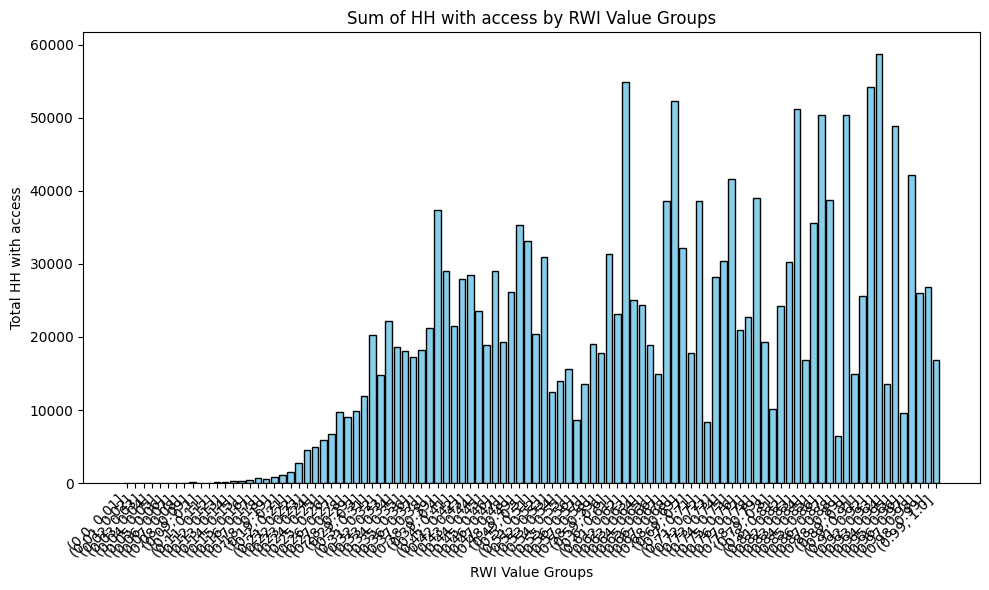

[11.29385159]


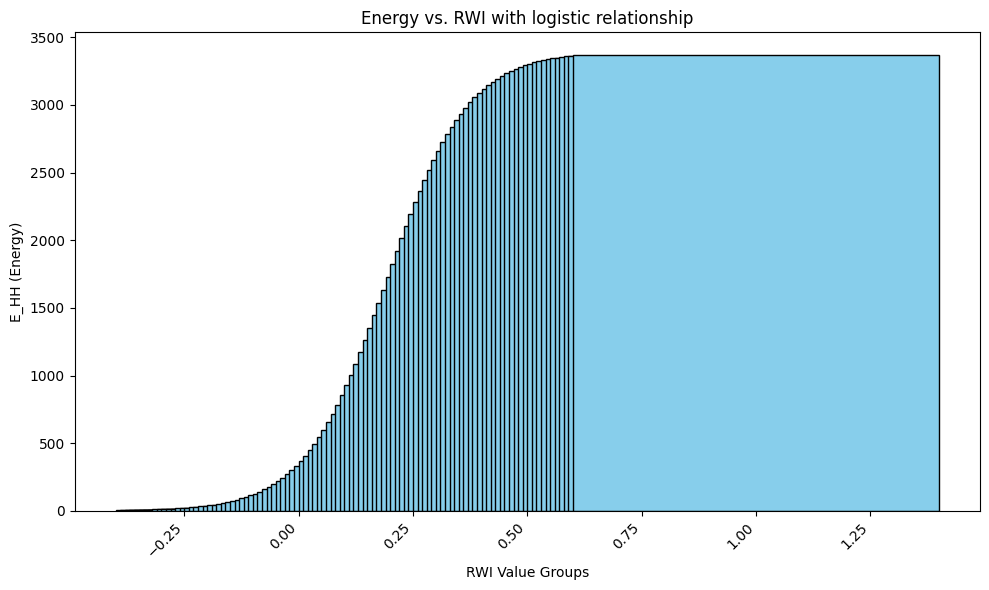

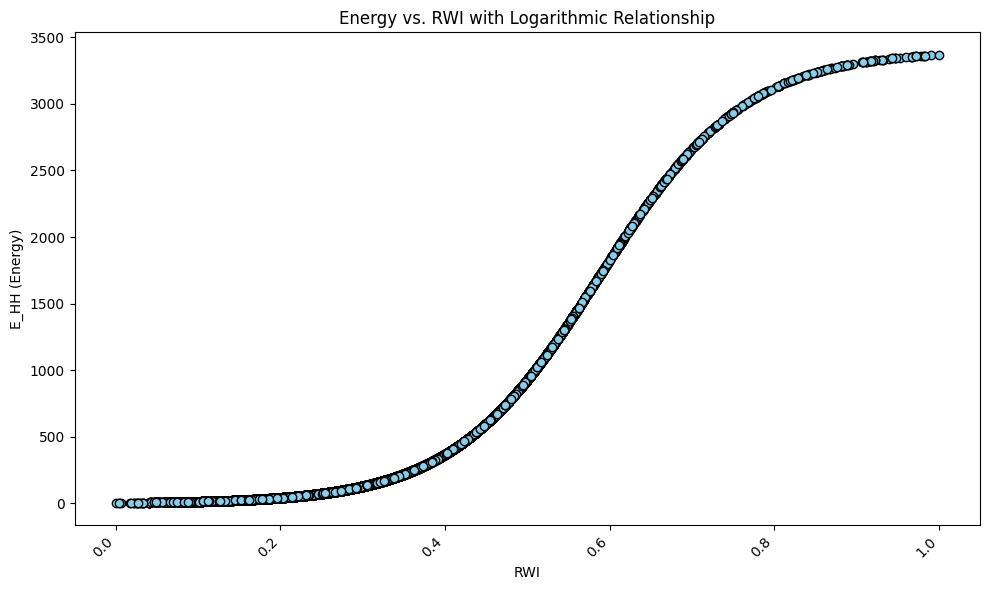

bin_labels
1   0.00
2   0.01
3   0.09
4   0.12
5   0.20
0   0.59
Name: HHwithAccess, dtype: float64
bin_labels
1   0.00
2   0.00
3   0.08
4   0.25
5   0.65
0   0.02
Name: HHwithAccess_urb, dtype: float64
bin_labels
1   0.00
2   0.01
3   0.09
4   0.06
5   0.02
0   0.81
Name: HHwithAccess_rur, dtype: float64
0.4861133701527587
residential electricity consumption UN STATS: 4,022 GWh
Index(['hexagons', 'lon', 'lat', 'index_righ', 'NAME_1', 'id', 'buildingssum',
       'locationWP', 'HREA', 'rwi', 'tiers', 'GDP_PPP', 'geometry',
       'Status_electrified', 'locWorldPop', 'location', 'res_urbanBui',
       'res_ruralBui', 'res_Bui', 'HH_urban', 'HH_rural', 'HH_total',
       'population', 'population_urban', 'population_rural',
       'HHwithAccess_urb', 'HHwithAccess_rur', 'HHwithAccess',
       'HHwoAccess_urb', 'HHwoAccess_rur', 'HHwoAccess', 'ResEnergyPerHH_rwi',
       'rwi_norm', 'index', 'ResEnergyPerHH_index', 'rwi_group',
       'ResEnergyPerHH_log', 'bin_labels', 'ResEnergyPerHH_D

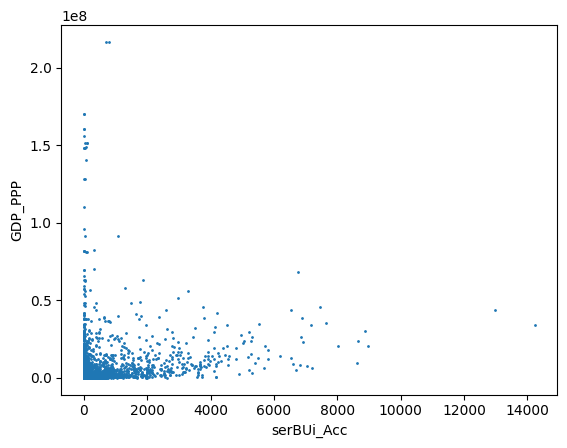

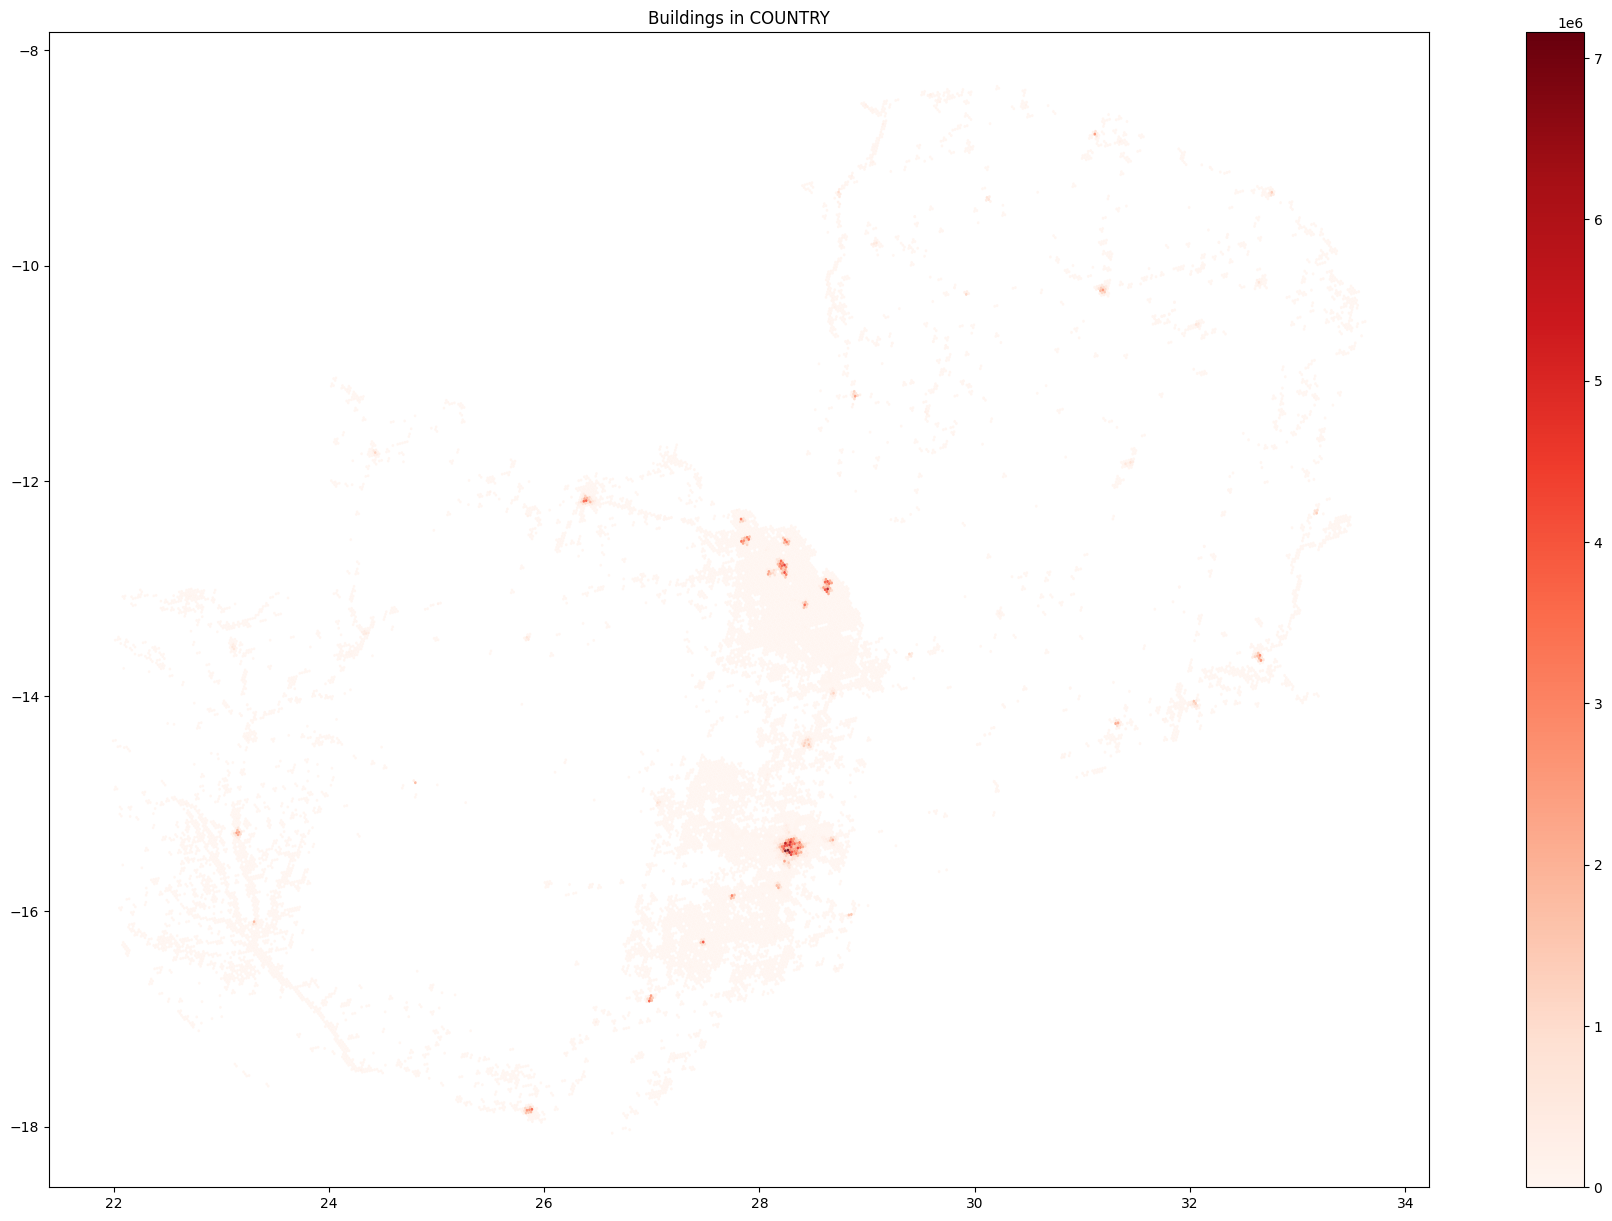

Services electricity consumption assessed after scaling:
Copperbelt 194.1 GWh
Muchinga 12.1 GWh
North-Western 43.4 GWh
Western 24.5 GWh
Luapula 25.2 GWh
Northern 27.4 GWh
Central 56.5 GWh
Southern 66.9 GWh
Eastern 40.5 GWh
Lusaka 231.0 GWh
NAME_1
Central          56.47
Copperbelt      194.07
Eastern          40.48
Luapula          25.20
Lusaka          231.05
Muchinga         12.09
North-Western    43.44
Northern         27.39
Southern         66.94
Western          24.54
Name: SEn_kWh_final, dtype: float64
721.6666666666669
Services electricity consumption assessed after scaling:
Copperbelt 1,490.3 GWh
Muchinga 39.5 GWh
North-Western 217.5 GWh
Western 89.9 GWh
Luapula 60.4 GWh
Northern 132.4 GWh
Central 287.3 GWh
Southern 324.8 GWh
Eastern 160.2 GWh
Lusaka 1,941.9 GWh
NAME_1
Central           287.28
Copperbelt      1,490.27
Eastern           160.20
Luapula            60.44
Lusaka          1,941.88
Muchinga           39.54
North-Western     217.48
Northern          132.43
Southern     

KeyError: 'REnS_kWh'

In [12]:
%run Residential/BuildingDemandMethod1_Simplified.ipynb


In [13]:
total_residentialenergy_assessed = grid['ResEnergy_kWh_meth3'].sum()
print("residential electricity consumption:", f"{total_residentialenergy_assessed/10**6:,.0f}","GWh") # GWh

residential electricity consumption: 4,422 GWh


In [ ]:
# grid["Commercial"] = grid.apply(lambda row: (row['buildingscount']*50 if ((row['buildingscount'] > 100))
                                             # else row['buildingscount']*100), axis=1)
# total_servicesenergy_assessed = grid["Commercial"].sum()
# print("services electricity consumption:", f"{total_servicesenergy_assessed/10**6:,.0f}","GWh") # GWh

In [14]:
%run Industry/IndustryDemand.ipynb
print("Industry electricity consumption in",f"{area}",f"{total_industryenergy/3600:,.1f}", "TWh")

Production at a site  Fitwaola Open Pit Mine  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mkushi Heap Leach  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
Production at a site  Mufulira West Heap-Leach Facility  in  Zambia  is missing (negative). Value set to zero. Please, change the input in the input file.
total statistical nonFerrousMetals electricity consumption: 22,897.0 TJ or  6.4 TWh
total statistical mining electricity consumption: 818.0 TJ or  0.2 TWh
total statistical nonFerrousMetals and mining electricity consumption: 23,715.0 TJ or  6.6 TWh
total calculated energy consumption: 17,986.6 TJ or  5.0 TWh
Coverage energy in total statistical nonFerrousMetals and mining electricity consumption: 76 %
Industry electricity consumption in COUNTRY : 6.6 TWh
Industry electricity consumption in COUNTRY 6.6 TWh


In [8]:
#Concatenate results
out_path = ROOT_DIR + "/Outputs"
# gridRes = gpd.read_file(out_path + "\\" + "res_energy_map.shp")
# gridRes = gpd.read_file(out_path + "\ser_energy_map.shp") # contains services and residential data
gridBui = gpd.read_file(out_path + "\ser_energy_map.geojson") # contains services and residential data
# gridRes = gridRes.to_crs(crs_proj)
# gridInd = gpd.read_file(out_path + "\ind_energy_map.shp")
gridInd = gpd.read_file(out_path + "\ind_energy_map.geojson")
# gridInd = gridInd.to_crs(crs_proj)
# init
grid = gridBui.copy()
grid = grid.merge(gridInd, on='id', suffixes=('', '_y'))
# grid = gpd.GeoDataFrame(grid,crs=crs_proj, geometry=grid.geometry)
grid.drop(grid.filter(regex='_y$').columns, axis=1, inplace=True)
# grid = gpd.pd.concat([gridRes, gridInd])
grid.head(4)

hexagons   lon    lat  index_righ    NAME_1  id  buildingssum  \
0  87399485cffffff 30.52 -12.18        5.00  Muchinga   1         57.00   
1  873995215ffffff 30.42 -10.43        7.00  Northern   2           NaN   
2  87344b340ffffff 25.31 -16.22        8.00  Southern   3           NaN   
3  87344b340ffffff 25.31 -16.22        9.00   Western   4           NaN   

   locationWP  HREA   rwi  ...  nb_men  nb_women_working nb_men_working  \
0        0.00  0.03 -0.81  ...   13.87              1.26           2.87   
1         NaN   NaN -0.40  ...     NaN               NaN            NaN   
2         NaN  0.09 -0.40  ...     NaN               NaN            NaN   
3         NaN  0.09 -0.40  ...     NaN               NaN            NaN   

  total_employee SEn_kWh_Emp  SEn_kWh_weighted  SEn_kWh_final  \
0           4.13    1,120.44               NaN            NaN   
1            NaN         NaN               NaN            NaN   
2            NaN         NaN               NaN            NaN   
3            NaN         NaN               NaN            NaN   

                                            geometry  Energy Elec [TJ]  \
0  POLYGON ((30.53691 -12.18031, 30.52690 -12.190...               NaN   
1  POLYGON ((30.43731 -10.42986, 30.42750 -10.440...               NaN   
2  POLYGON ((25.32539 -16.22858, 25.31506 -16.238...               NaN   
3  POLYGON ((25.32539 -16.22858, 25.31506 -16.238...               NaN   

   IndEne_TJ  
0        NaN  
1        NaN  
2        NaN  
3        NaN  

[4 rows x 63 columns]

In [9]:
# grid.columns

In [10]:
#Unit
grid["IndEnergy_GWh"]=grid["IndEne_TJ"]/3600 *10**3
total_ind = grid["IndEnergy_GWh"].sum()
print(f"{total_ind:,.0f}", "GWh")
grid['REnS_GWh'] = grid['ResEnergy_kWh_meth3']/10**6
total_res = grid["REnS_GWh"].sum()
print(f"{total_res:,.0f}", "GWh")
grid['SEn_GWh'] = grid['SEn_kWh_final']/10**6
total_ser = grid["SEn_GWh"].sum()
print(f"{total_ser:,.0f}", "GWh")

6,588 GWh
4,422 GWh
722 GWh


In [11]:
grid["TotalDem"] = grid.apply(lambda row: (np.nansum([row['REnS_GWh'], 
                                          row['SEn_GWh'],  
                                             row["IndEnergy_GWh"]
                                                     ])), axis=1) #sum in GWh

In [12]:
total = grid["TotalDem"].sum()
print("total electricity consumption:", f"{total:,.0f}","GWh") # GWh

total electricity consumption: 11,731 GWh


In [13]:
grid.head(3)

hexagons   lon    lat  index_righ    NAME_1  id  buildingssum  \
0  87399485cffffff 30.52 -12.18        5.00  Muchinga   1         57.00   
1  873995215ffffff 30.42 -10.43        7.00  Northern   2           NaN   
2  87344b340ffffff 25.31 -16.22        8.00  Southern   3           NaN   

   locationWP  HREA   rwi  ...  SEn_kWh_Emp  SEn_kWh_weighted SEn_kWh_final  \
0        0.00  0.03 -0.81  ...     1,120.44               NaN           NaN   
1         NaN   NaN -0.40  ...          NaN               NaN           NaN   
2         NaN  0.09 -0.40  ...          NaN               NaN           NaN   

                                            geometry Energy Elec [TJ]  \
0  POLYGON ((30.53691 -12.18031, 30.52690 -12.190...              NaN   
1  POLYGON ((30.43731 -10.42986, 30.42750 -10.440...              NaN   
2  POLYGON ((25.32539 -16.22858, 25.31506 -16.238...              NaN   

   IndEne_TJ  IndEnergy_GWh  REnS_GWh  SEn_GWh  TotalDem  
0        NaN            NaN       NaN      NaN      0.00  
1        NaN            NaN       NaN      NaN      0.00  
2        NaN            NaN       NaN      NaN      0.00  

[3 rows x 67 columns]

### Export result

In [14]:
crs_WGS84 = CRS("EPSG:4326")    # Originan WGS84 coordinate system
grid = grid.to_crs({ 'init': crs_WGS84}) 

In [15]:
with fiona.Env(OSR_WKT_FORMAT="WKT2_2018"):
    grid.to_file(out_path + "\\" + 'total_demand_grid.gpkg', driver="GPKG", index=False, engine='fiona')
#grid.to_file(out_path + "\\" + 'total_demand_grid.geojson', driver="GeoJSON")
grid.to_file(out_path + "\\" + f'total_demand.geojson', driver='GeoJSON', index=False)  

## Print maps for quick assessment

### Total demand map

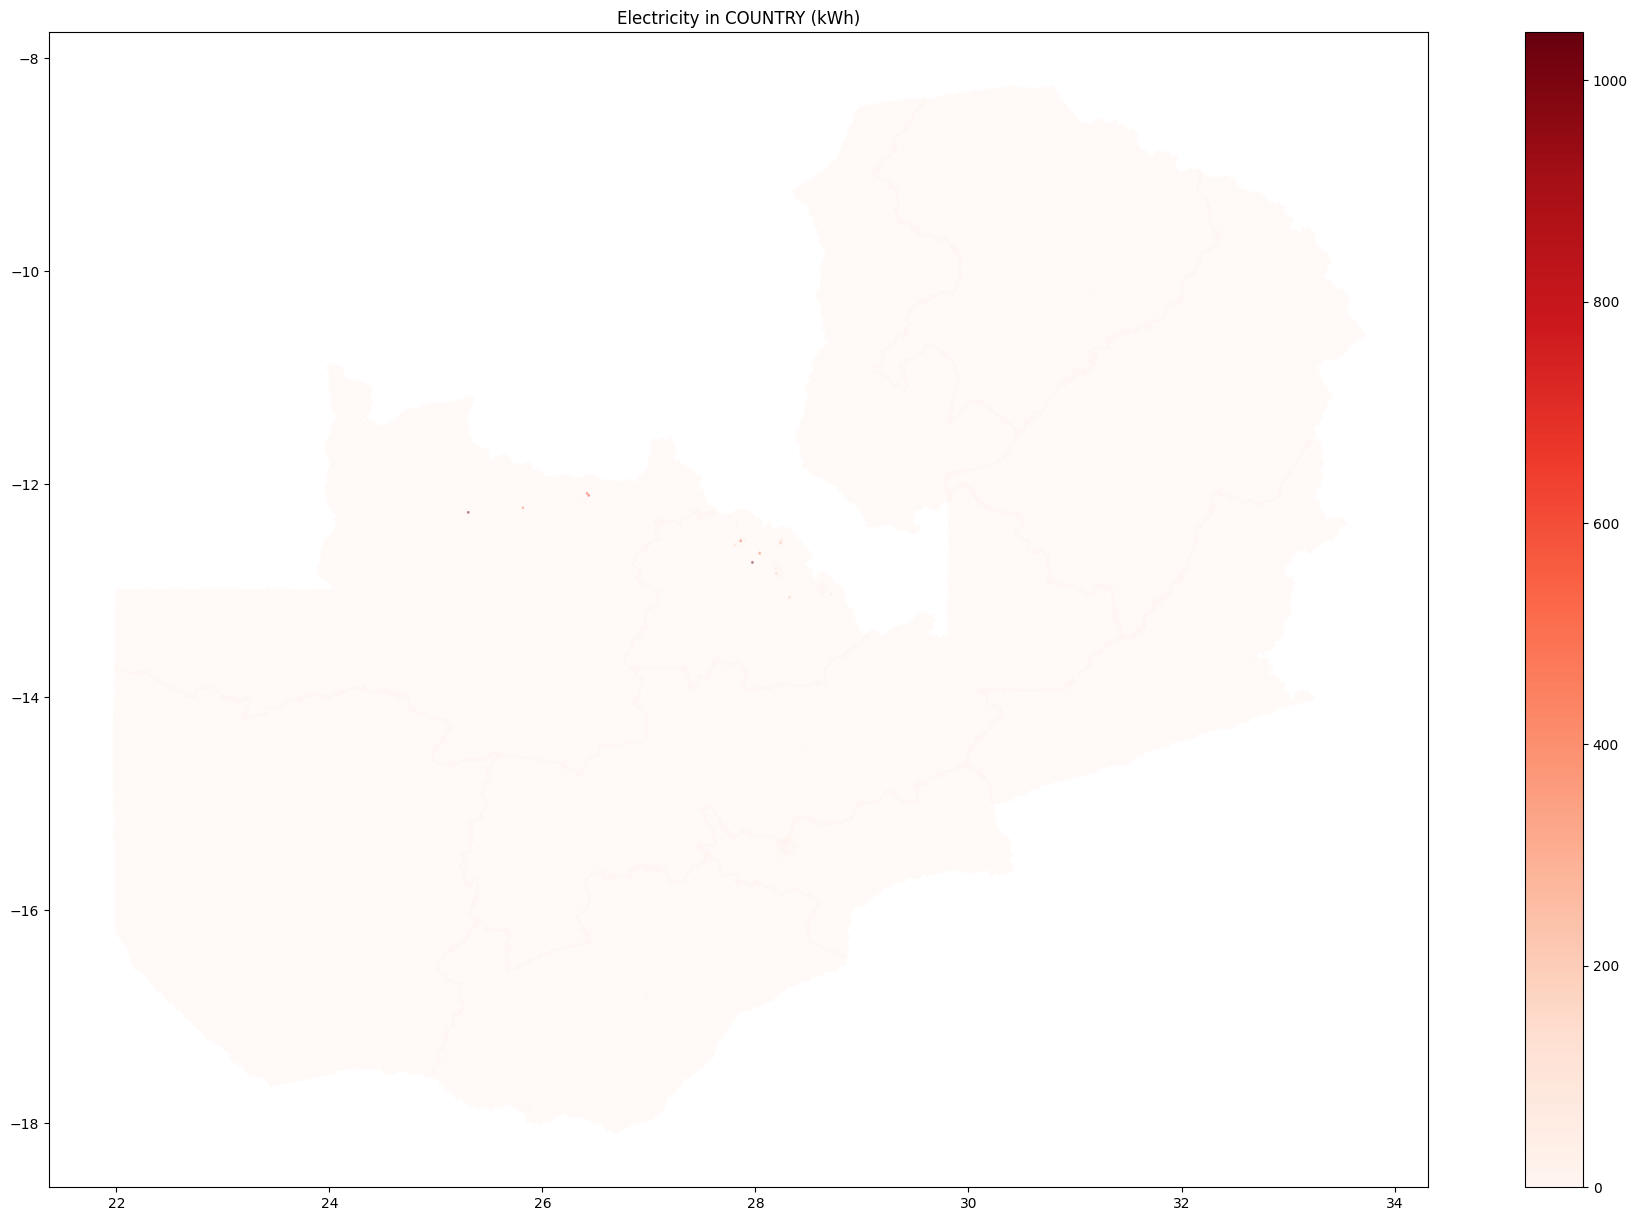

In [16]:
# Plot the demand map with use of the full scale
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map.png', bbox_inches='tight')

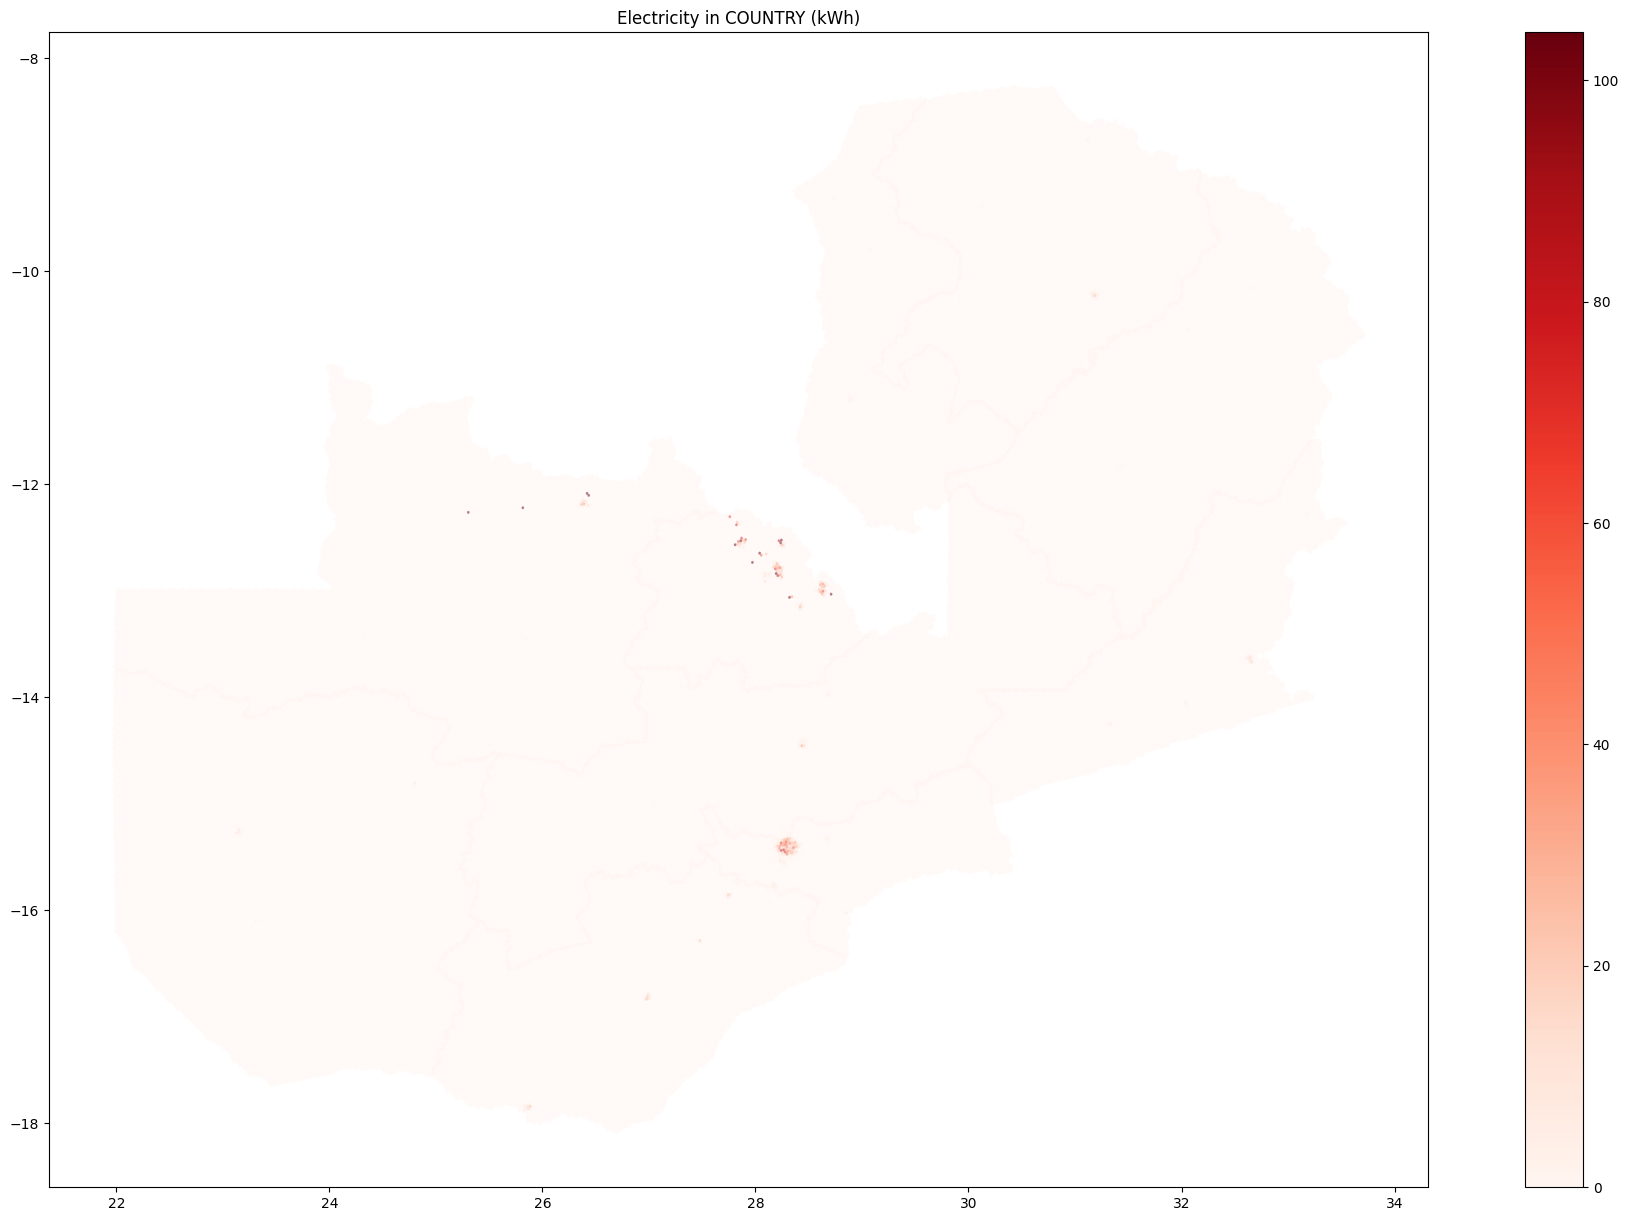

In [17]:
# Plot the demand map with a threshold value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Set the threshold
# threshold = np.percentile(npgrid['TotalDem'], 90)
threshold = 0.1 * grid['TotalDem'].max()

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_threshold.png', bbox_inches='tight')

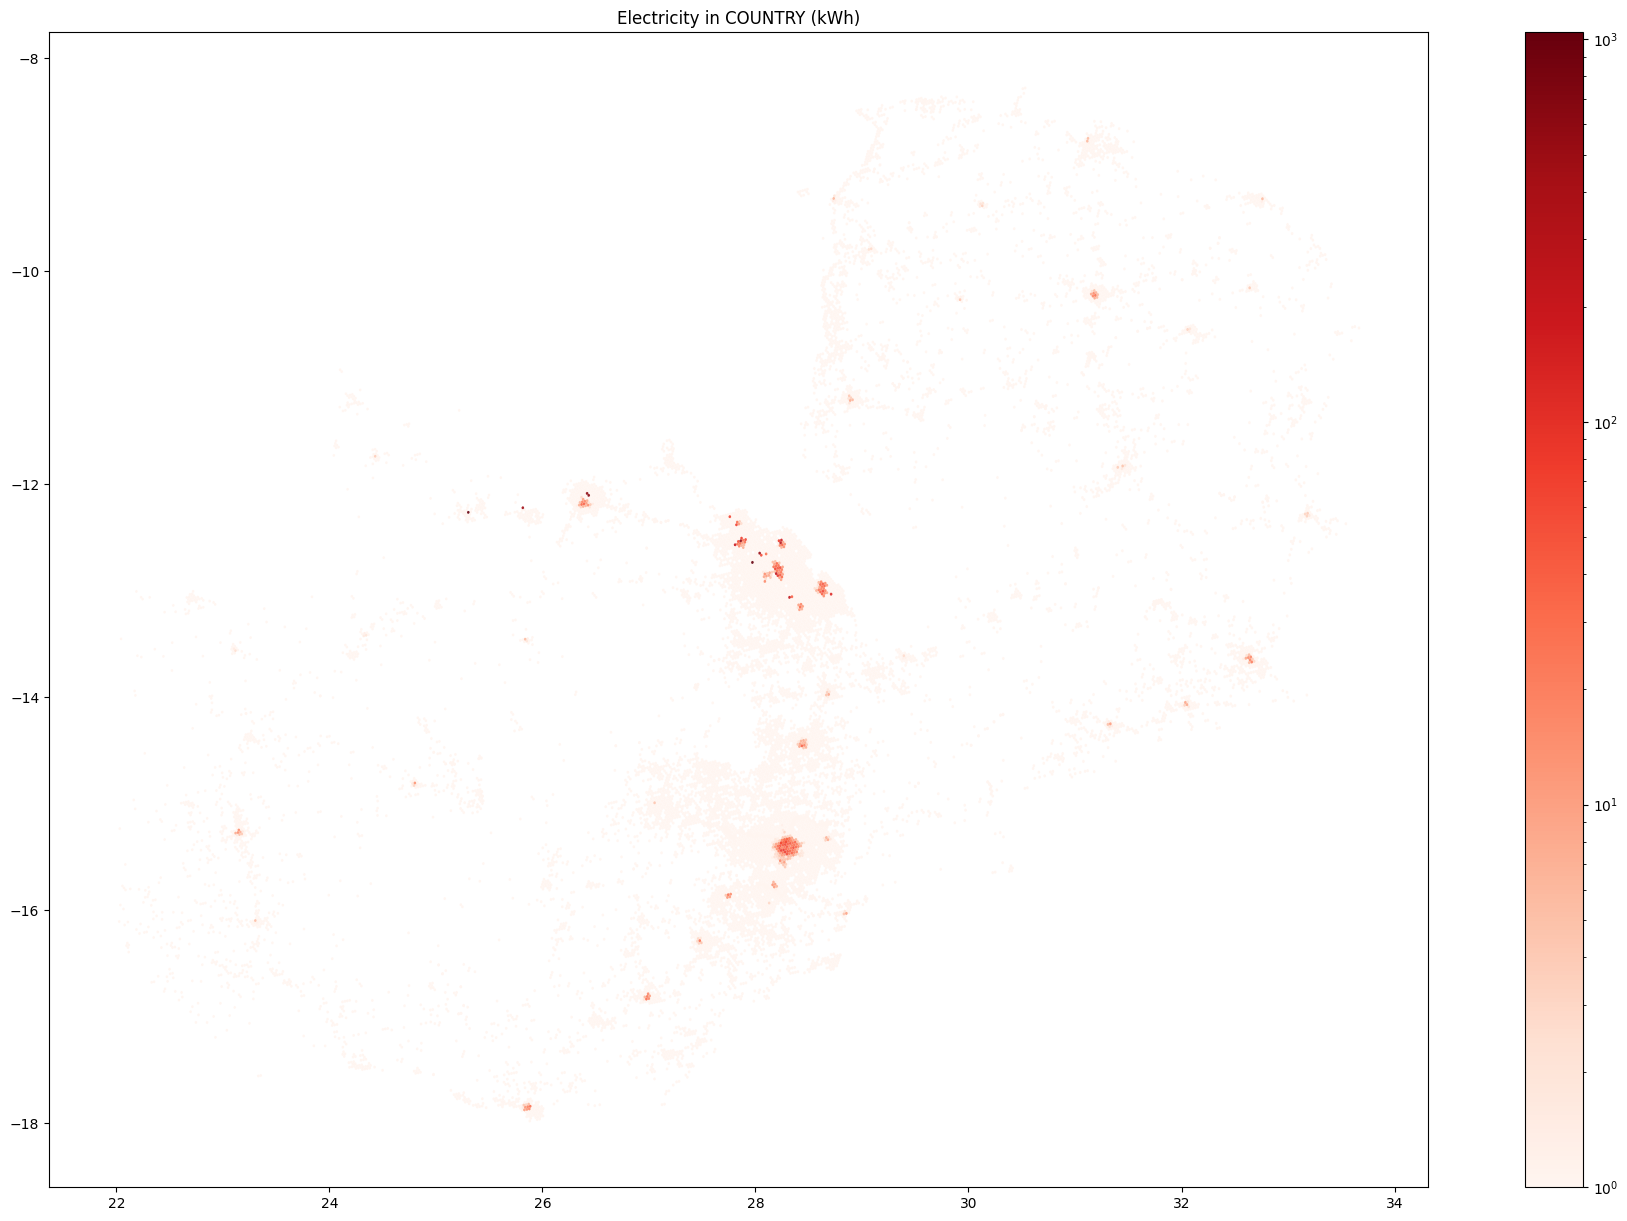

In [18]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('TotalDem', ascending=True).plot(
    ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['TotalDem'].max()))

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log.png', bbox_inches='tight')

### Residential map

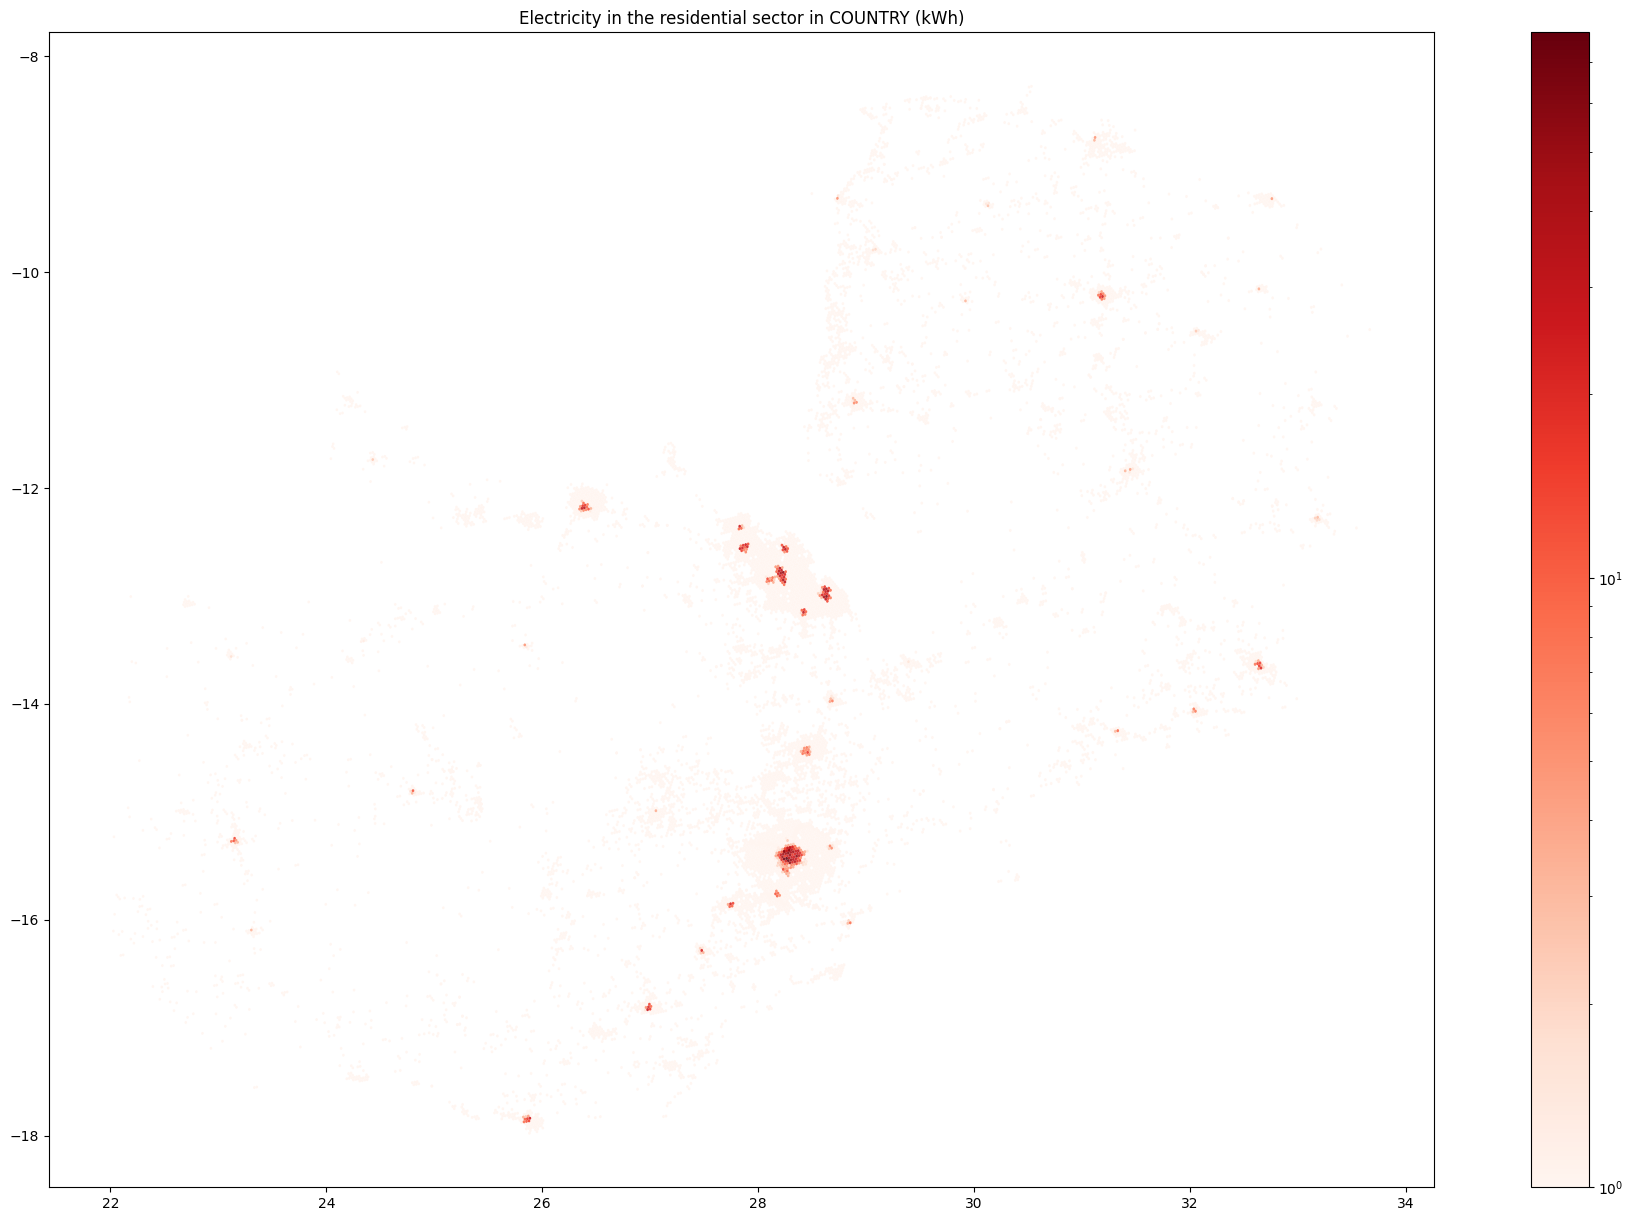

In [24]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('REnS_GWh', ascending=True).plot(
    ax=ax, column='REnS_GWh', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['REnS_GWh'].max()))

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in the residential sector in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log_res.png', bbox_inches='tight')

### Services map

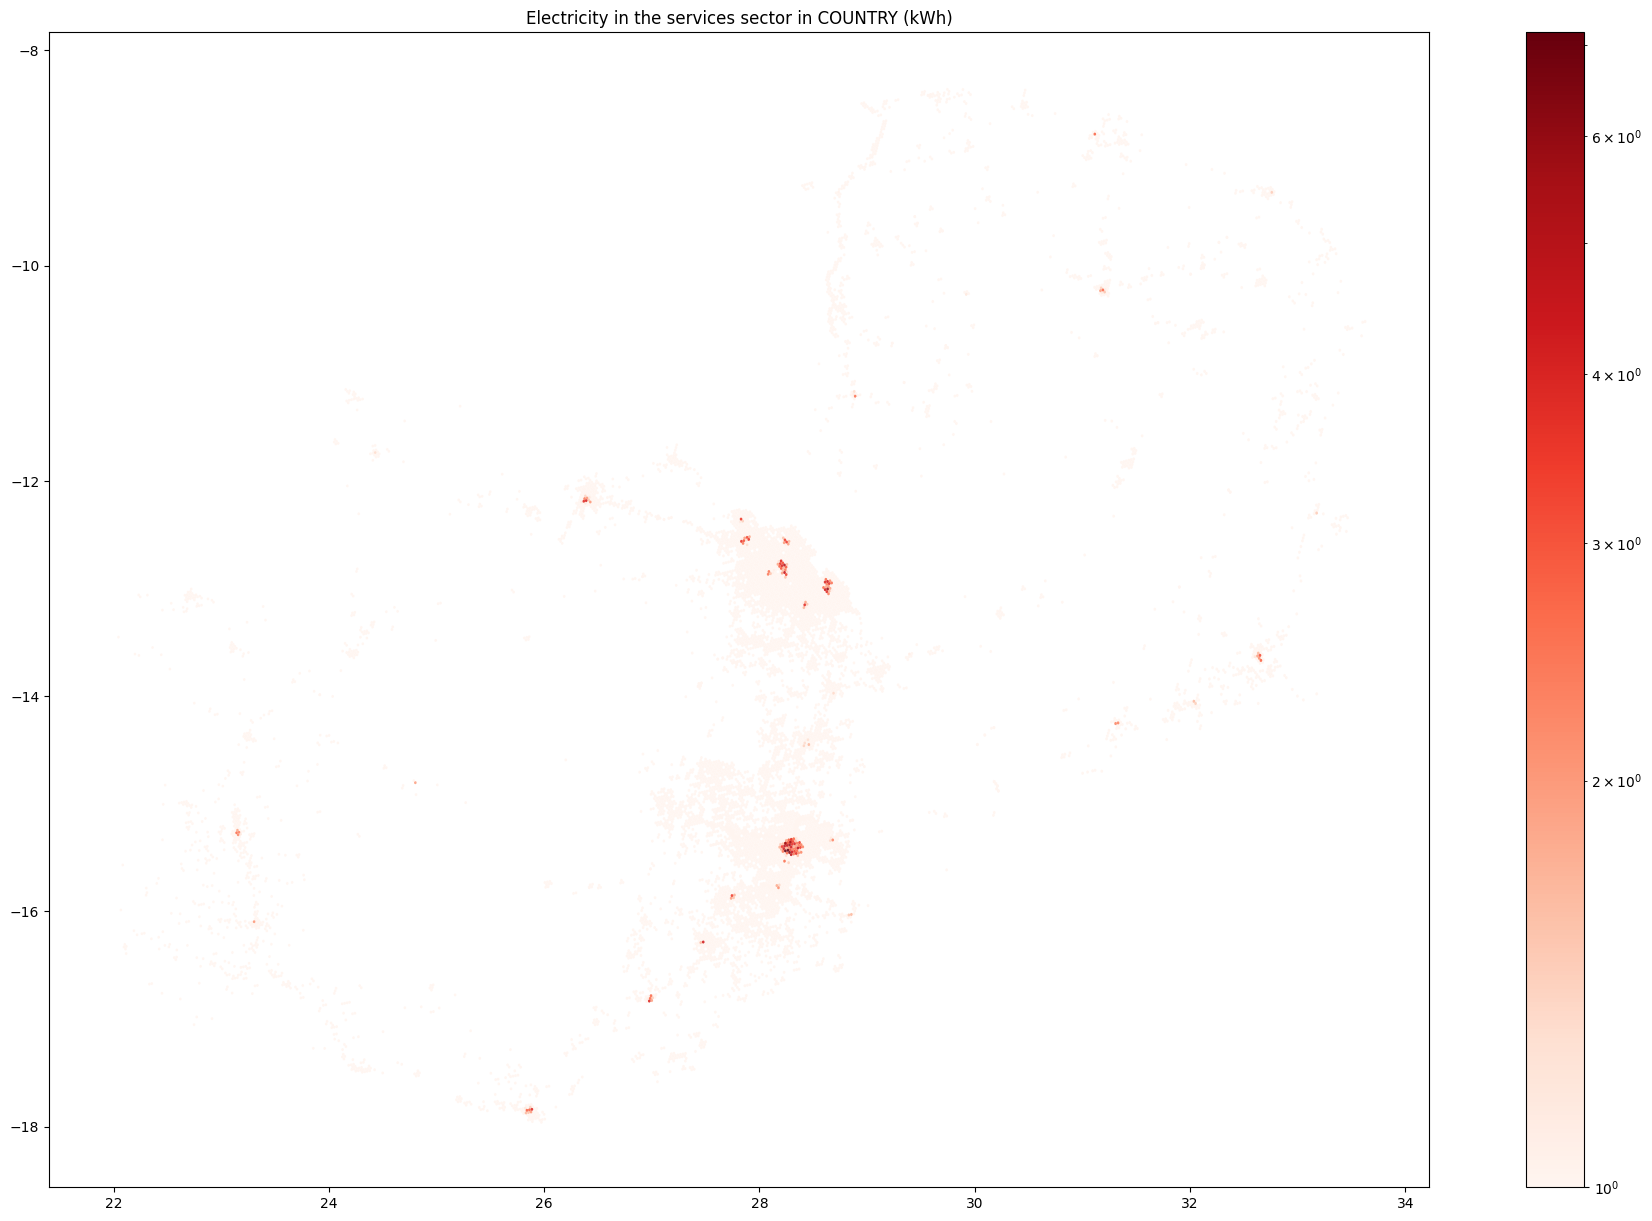

In [25]:
# Plot the demand map with a log scale value
# Create the axis first
fig, ax = plt.subplots(figsize=(25, 15))

# Plot data
grid.sort_values('SEn_GWh', ascending=True).plot(
    ax=ax, column='SEn_GWh', cmap="Reds", legend=True, alpha=0.9, norm=colors.LogNorm(vmin = 1, vmax=grid['SEn_GWh'].max()))

# # Plot data
# grid.sort_values('TotalDem', ascending=True).plot(
#     ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.5, vmin=0, vmax=threshold)

# # Plot data
# grid.sort_values('TotalDem', ascending=True).plot(
#     ax=ax, column='TotalDem', cmap="Reds", legend=True, alpha=0.9)

ax.set_aspect('equal', 'box')
txt = ax.set_title('Electricity in the services sector in {} (kWh)'.format(area) )

# Save plot as figure 
plt.savefig('sample_priority_map_log_ser.png', bbox_inches='tight')